In [1]:
!printf "1\n" | gmx editconf -f helix.pdb -princ -o helix_turned.pdb

                     :-) GROMACS - gmx editconf, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx editconf -f helix.pdb -princ -o helix_turned.pdb

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 300 atoms
Volume: 0 nm^3, corresponds to roughly 0 electrons
No velocities found
    system size :  2.228  1.961  1.439 (nm)
    center      :  0.363 -0.242 -0.139 (nm)
    box vectors :  0.000  0.000  0.000 (nm)
    box angles  :   0.00   0.00   0.00 (degrees)
    box volume  :   0.00               (nm^3)

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality ma

In [2]:
!gmx pdb2gmx -f helix_turned.pdb -o helix_processed.gro -water spce -ff "charmm27" -ignh

                     :-) GROMACS - gmx pdb2gmx, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx pdb2gmx -f helix_turned.pdb -o helix_processed.gro -water spce -ff charmm27 -ignh

Using the Charmm27 force field in directory charmm27.ff

going to rename charmm27.ff/aminoacids.r2b
Opening force field file /usr/local/gromacs/share/gromacs/top/charmm27.ff/aminoacids.r2b

going to rename charmm27.ff/rna.r2b
Opening force field file /usr/local/gromacs/share/gromacs/top/charmm27.ff/rna.r2b
Reading helix_turned.pdb...
Read 'Good gRace! Old Maple Actually Chews Slate', 99 atoms

Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.

There are 1 chains and 0 blocks of water and 13 residues with 99 atoms

  chain  #res #atoms

  1 'X'    12     99  

there were 0 atoms with zero occupancy and 99 atoms with          occupancy unequal to one (o

In [3]:
!gmx editconf -f helix_processed.gro -o helix_newbox.gro -c -d 1.0 -bt dodecahedron

                     :-) GROMACS - gmx editconf, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx editconf -f helix_processed.gro -o helix_newbox.gro -c -d 1.0 -bt dodecahedron

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 186 atoms
Volume: 5.19314 nm^3, corresponds to roughly 2300 electrons
No velocities found
    system size :  2.249  1.646  1.404 (nm)
    diameter    :  2.379               (nm)
    center      :  0.538 -0.407 -0.146 (nm)
    box vectors :  2.248  1.645  1.404 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :   5.19               (nm^3)
    shift       :  2.747  3.691  1.694 (nm)
new center      :  3.284  3.284  1.548 (nm)
new box vectors :  4.379  4.379  4.379 (nm)
new box angles  :  60.00  60.00  90.00 (degrees)
new box volume  :  59.39               (nm^3)

GROMACS rem

In [4]:
!gmx solvate -cp helix_newbox.gro -cs spc216.gro -o helix_solv.gro -p topol.top

                     :-) GROMACS - gmx solvate, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx solvate -cp helix_newbox.gro -cs spc216.gro -o helix_solv.gro -p topol.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS version

In [5]:
!gmx grompp -f ions.mdp -c helix_solv.gro -p topol.top -o ions.tpr

                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx grompp -f ions.mdp -c helix_solv.gro -p topol.top -o ions.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to 2063331231

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_X'

Excluding 2 bonded neighbours molecule type 'SOL'

NOTE 2 [file topol.top, line 1836]:
  System has non-zero total charge: -1.000000
  Total charge should normally be an integer. See
  https://manual.gromacs.org/current/user-

In [7]:
!printf "SOL" | gmx genion -s ions.tpr -o helix_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

                      :-) GROMACS - gmx genion, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx genion -s ions.tpr -o helix_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

Reading file ions.tpr, VERSION 2024.1 (single precision)
Reading file ions.tpr, VERSION 2024.1 (single precision)
Will try to add 1 NA ions and 0 CL ions.
Select a continuous group of solvent molecules
Group     0 (         System) has  5859 elements
Group     1 (        Protein) has   186 elements
Group     2 (      Protein-H) has   100 elements
Group     3 (        C-alpha) has    12 elements
Group     4 (       Backbone) has    36 elements
Group     5 (      MainChain) has    47 elements
Group     6 (   MainChain+Cb) has    58 elements
Group     7 (    MainChain+H) has    59 elements
Group     8 (      SideChain) has   127 elements
Group     9 (    SideChain-H) has    53 elements
Gro

In [8]:
!gmx grompp -f minim.mdp -c helix_solv_ions.gro -p topol.top -o em.tpr

                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx grompp -f minim.mdp -c helix_solv_ions.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -268451841

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_X'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'NA'
Analysing residue names:
There are:    12    Protein residues
There are:  1890      Water residues
There are:     1     

In [9]:
!gmx mdrun -deffnm em

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx mdrun -deffnm em

Reading file em.tpr, VERSION 2024.1 (single precision)
Using 1 MPI thread
Using 4 OpenMP threads 


Steepest Descents:
   Tolerance (Fmax)   =  5.00000e+02
   Number of steps    =        50000

writing lowest energy coordinates.

Steepest Descents converged to Fmax < 500 in 602 steps
Potential Energy  = -9.9971211e+04
Maximum force     =  4.7931360e+02 on atom 73
Norm of force     =  2.7709173e+01

GROMACS reminds you: "Like what you do, and then you will do your best." (Katherine Johnson)



                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx energy -f em.edr -o potential.xvg -xvg none

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Pressure      
 13  Vir-XX          14  Vir-XY          15  Vir-XZ          16  Vir-YX        
 17  Vir-YY          18  Vir-YZ          19  Vir-ZX          20  Vir-ZY        
 21  Vir-ZZ          22  Pres-XX         23  Pres-

<Axes: xlabel='step'>

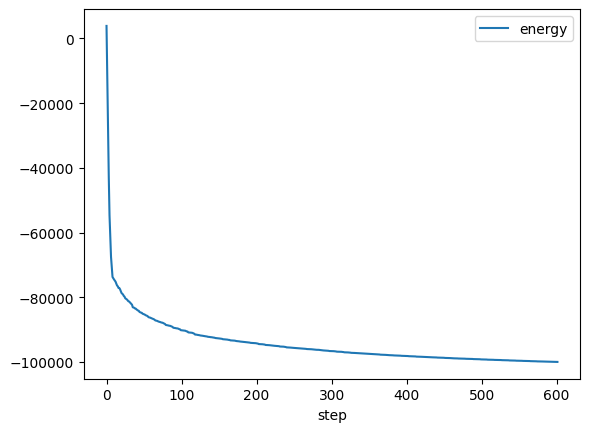

In [10]:
!printf "Potential\n" | gmx energy -f em.edr -o potential.xvg -xvg none
import pandas as pd
df = pd.read_csv('potential.xvg', sep='\s+', header=None, names=['step','energy'])
df.plot('step')

In [11]:
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -1292902405

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_X'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Setting gen_seed to -1369735437

Velocities were taken from a Maxwell distribution at 300 K
Analysing residue names:
There are:    12    Protein residues
There are: 

In [12]:
!gmx mdrun -v -deffnm nvt

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx mdrun -v -deffnm nvt

Reading file nvt.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.118

Using 1 MPI thread
Using 4 OpenMP threads 

starting mdrun 'Good gRace! Old Maple Actually Chews Slate in water'
50000 steps,    100.0 ps.
step 49900, remaining wall clock time:     0 s          
Writing final coordinates.
step 50000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:      284.029       71.007      400.0
                 (ns/day)    (hour/ns)
Performance:      121.680        0.197

GROMACS reminds you: "I never see what has been done; I only see what remains to be done." (Marie Curie)



                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/phe_all
Command line:
  gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Disper.-corr.   10  Coulomb-(SR)    11  Coul.-recip.    12  Position-Rest.
 13  Potential       14  Kinetic-En.     15  Total-Energy    16  Conserved-En. 
 17  Temperature     18  Pres.-DC        19  Pressure        20  Constr.-rmsd  
 21  Vir-XX          22  Vir-XY          23  V

<Axes: xlabel='time'>

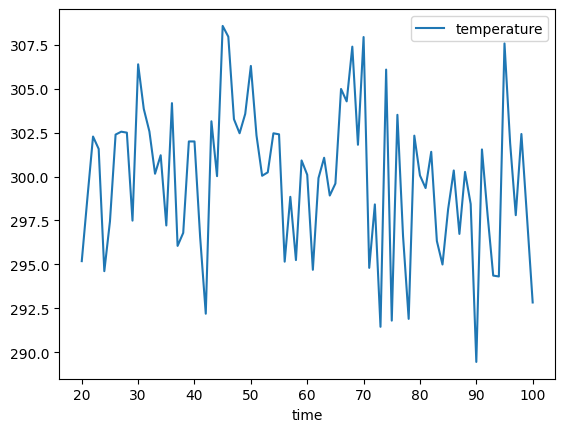

In [1]:
!printf "Temperature\n" | gmx energy -f nvt.edr -o temperature.xvg -xvg none -b 20
import pandas as pd
df = pd.read_csv('temperature.xvg', sep='\s+', header=None, names=['time','temperature'])
df.plot('time')

In [14]:
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 2140127195

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_X'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

NOTE 1 [file topol.top, line 1837]:
  You are combining position restraints with Parrinello-Rahman pressure
  coupling, which can lead to instabilities. 

In [15]:
!gmx mdrun -v -deffnm npt

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx mdrun -v -deffnm npt

Reading file npt.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.117

Using 1 MPI thread
Using 4 OpenMP threads 

starting mdrun 'Good gRace! Old Maple Actually Chews Slate in water'
50000 steps,    100.0 ps.
step 49900, remaining wall clock time:     0 s          , remaining wall clock time:    48 s          , remaining wall clock time:    36 s          , remaining wall clock time:    23 s          , remaining wall clock time:    19 s          37900, remaining wall clock time:    18 s          
Writing final coordinates.
step 50000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:      305.281       76.320      400.0
                 (ns/day)    (hou

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/phe_all
Command line:
  gmx energy -f npt.edr -o density.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Disper.-corr.   10  Coulomb-(SR)    11  Coul.-recip.    12  Position-Rest.
 13  Potential       14  Kinetic-En.     15  Total-Energy    16  Conserved-En. 
 17  Temperature     18  Pres.-DC        19  Pressure        20  Constr.-rmsd  
 21  Box-X           22  Box-Y           23  Box-Z      

<Axes: xlabel='time'>

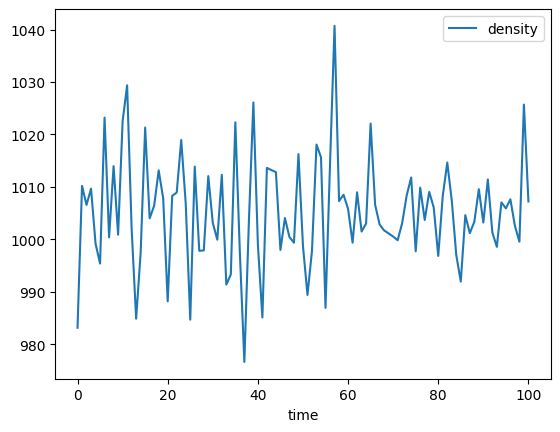

In [2]:
!printf "Density\n" | gmx energy -f npt.edr -o density.xvg -xvg none
import pandas as pd
df = pd.read_csv('density.xvg', sep='\s+', header=None, names=['time','density'])
df.plot('time')

In [17]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr

                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -134791427

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_X'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...
Analysing residue names:
There are:    12    Protein residues
There are:  1890      Water residues
There are:     1        Ion residues
Analysing Protein...
Number

In [18]:
!gmx mdrun -v -deffnm md_0_1

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx mdrun -v -deffnm md_0_1

Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.119

Using 1 MPI thread
Using 4 OpenMP threads 

starting mdrun 'Good gRace! Old Maple Actually Chews Slate in water'
2000000 steps,   4000.0 ps.
step 1999900, remaining wall clock time:     0 s          nish Fri May  3 16:46:55 2024149000, will finish Fri May  3 16:46:55 2024202400, will finish Fri May  3 16:47:32 2024333100, will finish Fri May  3 16:46:30 2024531700, will finish Fri May  3 16:46:08 2024, will finish Fri May  3 16:46:15 20241105600, will finish Fri May  3 16:46:15 2024, will finish Fri May  3 16:46:22 2024, will finish Fri May  3 16:46:23 2024, will finish Fri May  3 16:46:25 2024
Writing final coordinates.
step 2000000,

In [26]:
!printf "1\n0\n" | gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -center

                     :-) GROMACS - gmx trjconv, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/test_unstable
Command line:
  gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -center

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Select group for centering
Group     0 (         System) has  5857 elements
Group     1 (        Protein) has   186 elements
Group     2 (      Protein-H) has   100 elements
Group     3 (        C-alpha) has    12 elements
Group     4 (       Backbone) has    36 elements
Group     5 (      MainChain) has    47 elements
Group     6 (   MainChain+Cb) has    58 elements
Group     7 (    MainChain+H) has    59 elements
Group     8

In [3]:
!printf "1\n" | gmx mindist -s md_0_1.tpr -f md_0_1_noPBC.xtc -pi -od mindist.xvg -xvg none
!xmgrace mindist.xvg

                     :-) GROMACS - gmx mindist, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/phe_all
Command line:
  gmx mindist -s md_0_1.tpr -f md_0_1_noPBC.xtc -pi -od mindist.xvg -xvg none

Choose a group for distance calculation
Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Group     0 (         System) has  6618 elements
Group     1 (        Protein) has   243 elements
Group     2 (      Protein-H) has   133 elements
Group     3 (        C-alpha) has    12 elements
Group     4 (       Backbone) has    36 elements
Group     5 (      MainChain) has    47 elements
Group     6 (   MainChain+Cb) has    59 elements
Group     7 (    MainChain+H) has    61 elements
Group     8 (      SideChain) has   182 elements
Group     9 (    SideChain-H) has    86 elements
Group    10 (    Prot-Masses) has   243 elements
Group    11 (   

                       :-) GROMACS - gmx rms, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/val_all
Command line:
  gmx rms -s em.tpr -f md_0_1_noPBC.xtc -o rmsd.xvg -tu ns -xvg none

Reading file em.tpr, VERSION 2024.1 (single precision)
Reading file em.tpr, VERSION 2024.1 (single precision)
Select group for least squares fit
Group     0 (         System) has  5223 elements
Group     1 (        Protein) has   195 elements
Group     2 (      Protein-H) has    85 elements
Group     3 (        C-alpha) has    12 elements
Group     4 (       Backbone) has    36 elements
Group     5 (      MainChain) has    47 elements
Group     6 (   MainChain+Cb) has    59 elements
Group     7 (    MainChain+H) has    61 elements
Group     8 (      SideChain) has   134 elements
Group     9 (    SideChain-H) has    38 elements
Group    10 (    Prot-Masses) has   195 elements
Group    11 (    non-Protein) has  5028 

<Axes: xlabel='time'>

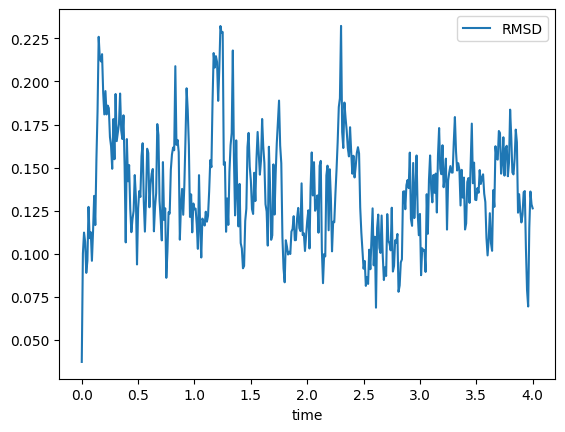

In [1]:
!printf "4\n4\n" | gmx rms -s em.tpr -f md_0_1_noPBC.xtc -o rmsd.xvg -tu ns -xvg none
import pandas as pd
df = pd.read_csv('rmsd.xvg', sep='\s+', header=None, names=['time','RMSD'])
print(df[df.time>0.5].RMSD.mean())
df.plot('time')

                      :-) GROMACS - gmx gyrate, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/val_all
Command line:
  gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate.xvg -xvg none

Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Reading file md_0_1.tpr, VERSION 2024.1 (single precision)
Last frame        400 time 4000.000   
Analyzed 401 frames, last time 4000.000

GROMACS reminds you: "In science it often happens that scientists say, 'You know that's a really good argument; my position is mistaken,' and then they would actually change their minds and you never hear that old view from them again. They really do it. It doesn't happen as often as it should, because scientists are human and change is sometimes painful. But it happens every day. I cannot recall the last time something like that happened in politics or religion." (Carl Sagan)



<Axes: xlabel='time'>

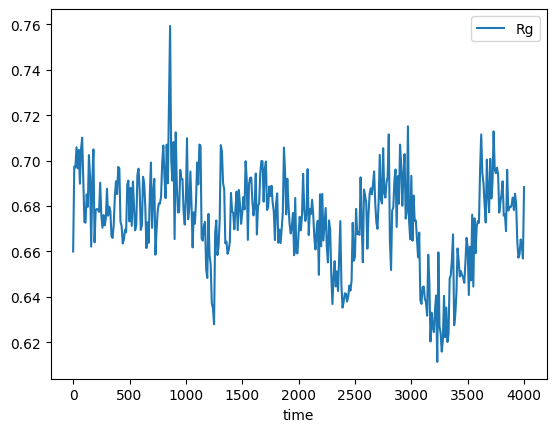

In [2]:
!echo "1" | gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate.xvg -xvg none
import pandas as pd
df = pd.read_csv('gyrate.xvg', sep='\s+', header=None, names=['time','Rg'], usecols=[0, 1])
df.plot('time')

                     :-) GROMACS - gmx make_ndx, 2024.1 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/hamajun/study/4_sem/inf/helices/val_all
Command line:
  gmx make_ndx -f nvt.tpr -o


Reading structure file
Reading file nvt.tpr, VERSION 2024.1 (single precision)
Reading file nvt.tpr, VERSION 2024.1 (single precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:    12    Protein residues
There are:  1676      Water residues
Analysing Protein...

  0 System              :  5223 atoms
  1 Protein             :   195 atoms
  2 Protein-H           :    85 atoms
  3 C-alpha             :    12 atoms
  4 Backbone            :    36 atoms
  5 MainChain           :    47 atoms
  6 MainChain+Cb        :    59 atoms
  7 MainChain+H         :    61 atoms
  8 SideChain           :   134 atoms
  9 SideChain-H         :    38 atoms
 10 Prot-Masses         :   195 atoms
 11 non-Protein         :  5028 atoms
 12 Water     

<Axes: xlabel='time'>

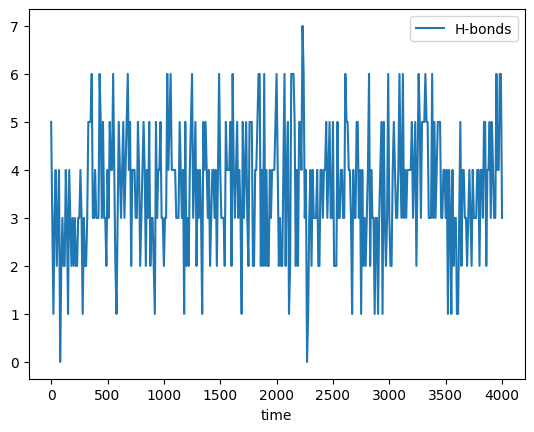

In [3]:
!printf "splitch 1\nq\n" | gmx make_ndx -f nvt.tpr -o 
!printf "1\n1\n"| gmx hbond -f md_0_1_noPBC.xtc -s md_0_1.tpr -n index.ndx -num -xvg none
import pandas as pd
df = pd.read_csv('hbnum.xvg', sep='\s+', header=None, names=['time','H-bonds'], usecols=[0, 1])
df.plot('time')

In [27]:
!vmd md_0_1.gro md_0_1_noPBC.xtc

/usr/local/lib/vmd/vmd_LINUXAMD64: /lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /usr/local/lib/vmd/vmd_LINUXAMD64)
Info) VMD for LINUXAMD64, version 1.9.3 (November 30, 2016)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 4 CPUs detected.
Info)   CPU features: SSE2 AVX AVX2 FMA 
Info) Free system memory: 3106MB (42%)
Info) No CUDA accelerator devices available.
Warning) Detected X11 'Composite' extension: if incorrect display occurs
Warning) try disabling this X server option.  Most OpenGL drivers
Warning) disable stereoscopic display when 'Composite' is enabled.
In

In [4]:
import csv
df1 = pd.read_csv('rmsd.xvg', sep='\s+', header=None, names=['time','RMSD'])
df2 = pd.read_csv('gyrate.xvg', sep='\s+', header=None, names=['time','Rg'], usecols=[0, 1])
df3 = pd.read_csv('hbnum.xvg', sep='\s+', header=None, names=['time','H-bonds'], usecols=[0, 1])
with open("../table.csv", "a") as f:
    writer = csv.writer(f, delimiter=";")
    writer.writerow([input(), df1[df1.time>0.5].RMSD.mean(), df2[df2.time>0.5].Rg.mean(), df3[df3.time>0.5]["H-bonds"].mean()])

 val_all
